# Determining The Launch Window to Get a Rover to Mars Using Hohmann Orbits

Hohmnann Transfer Orbit: an orbital maneuver used to transfer a spacecraft between two orbits of different altitudes

*   The most efficient way to get a rover to mars
* The Hohmann transfer is one half of a Hohmann orbit. (grey line and dotted line)
* The rover must exit earth at the Hohmann orbit's perihelion and arrive at Mars at the Hohmann orbit's aphelion.

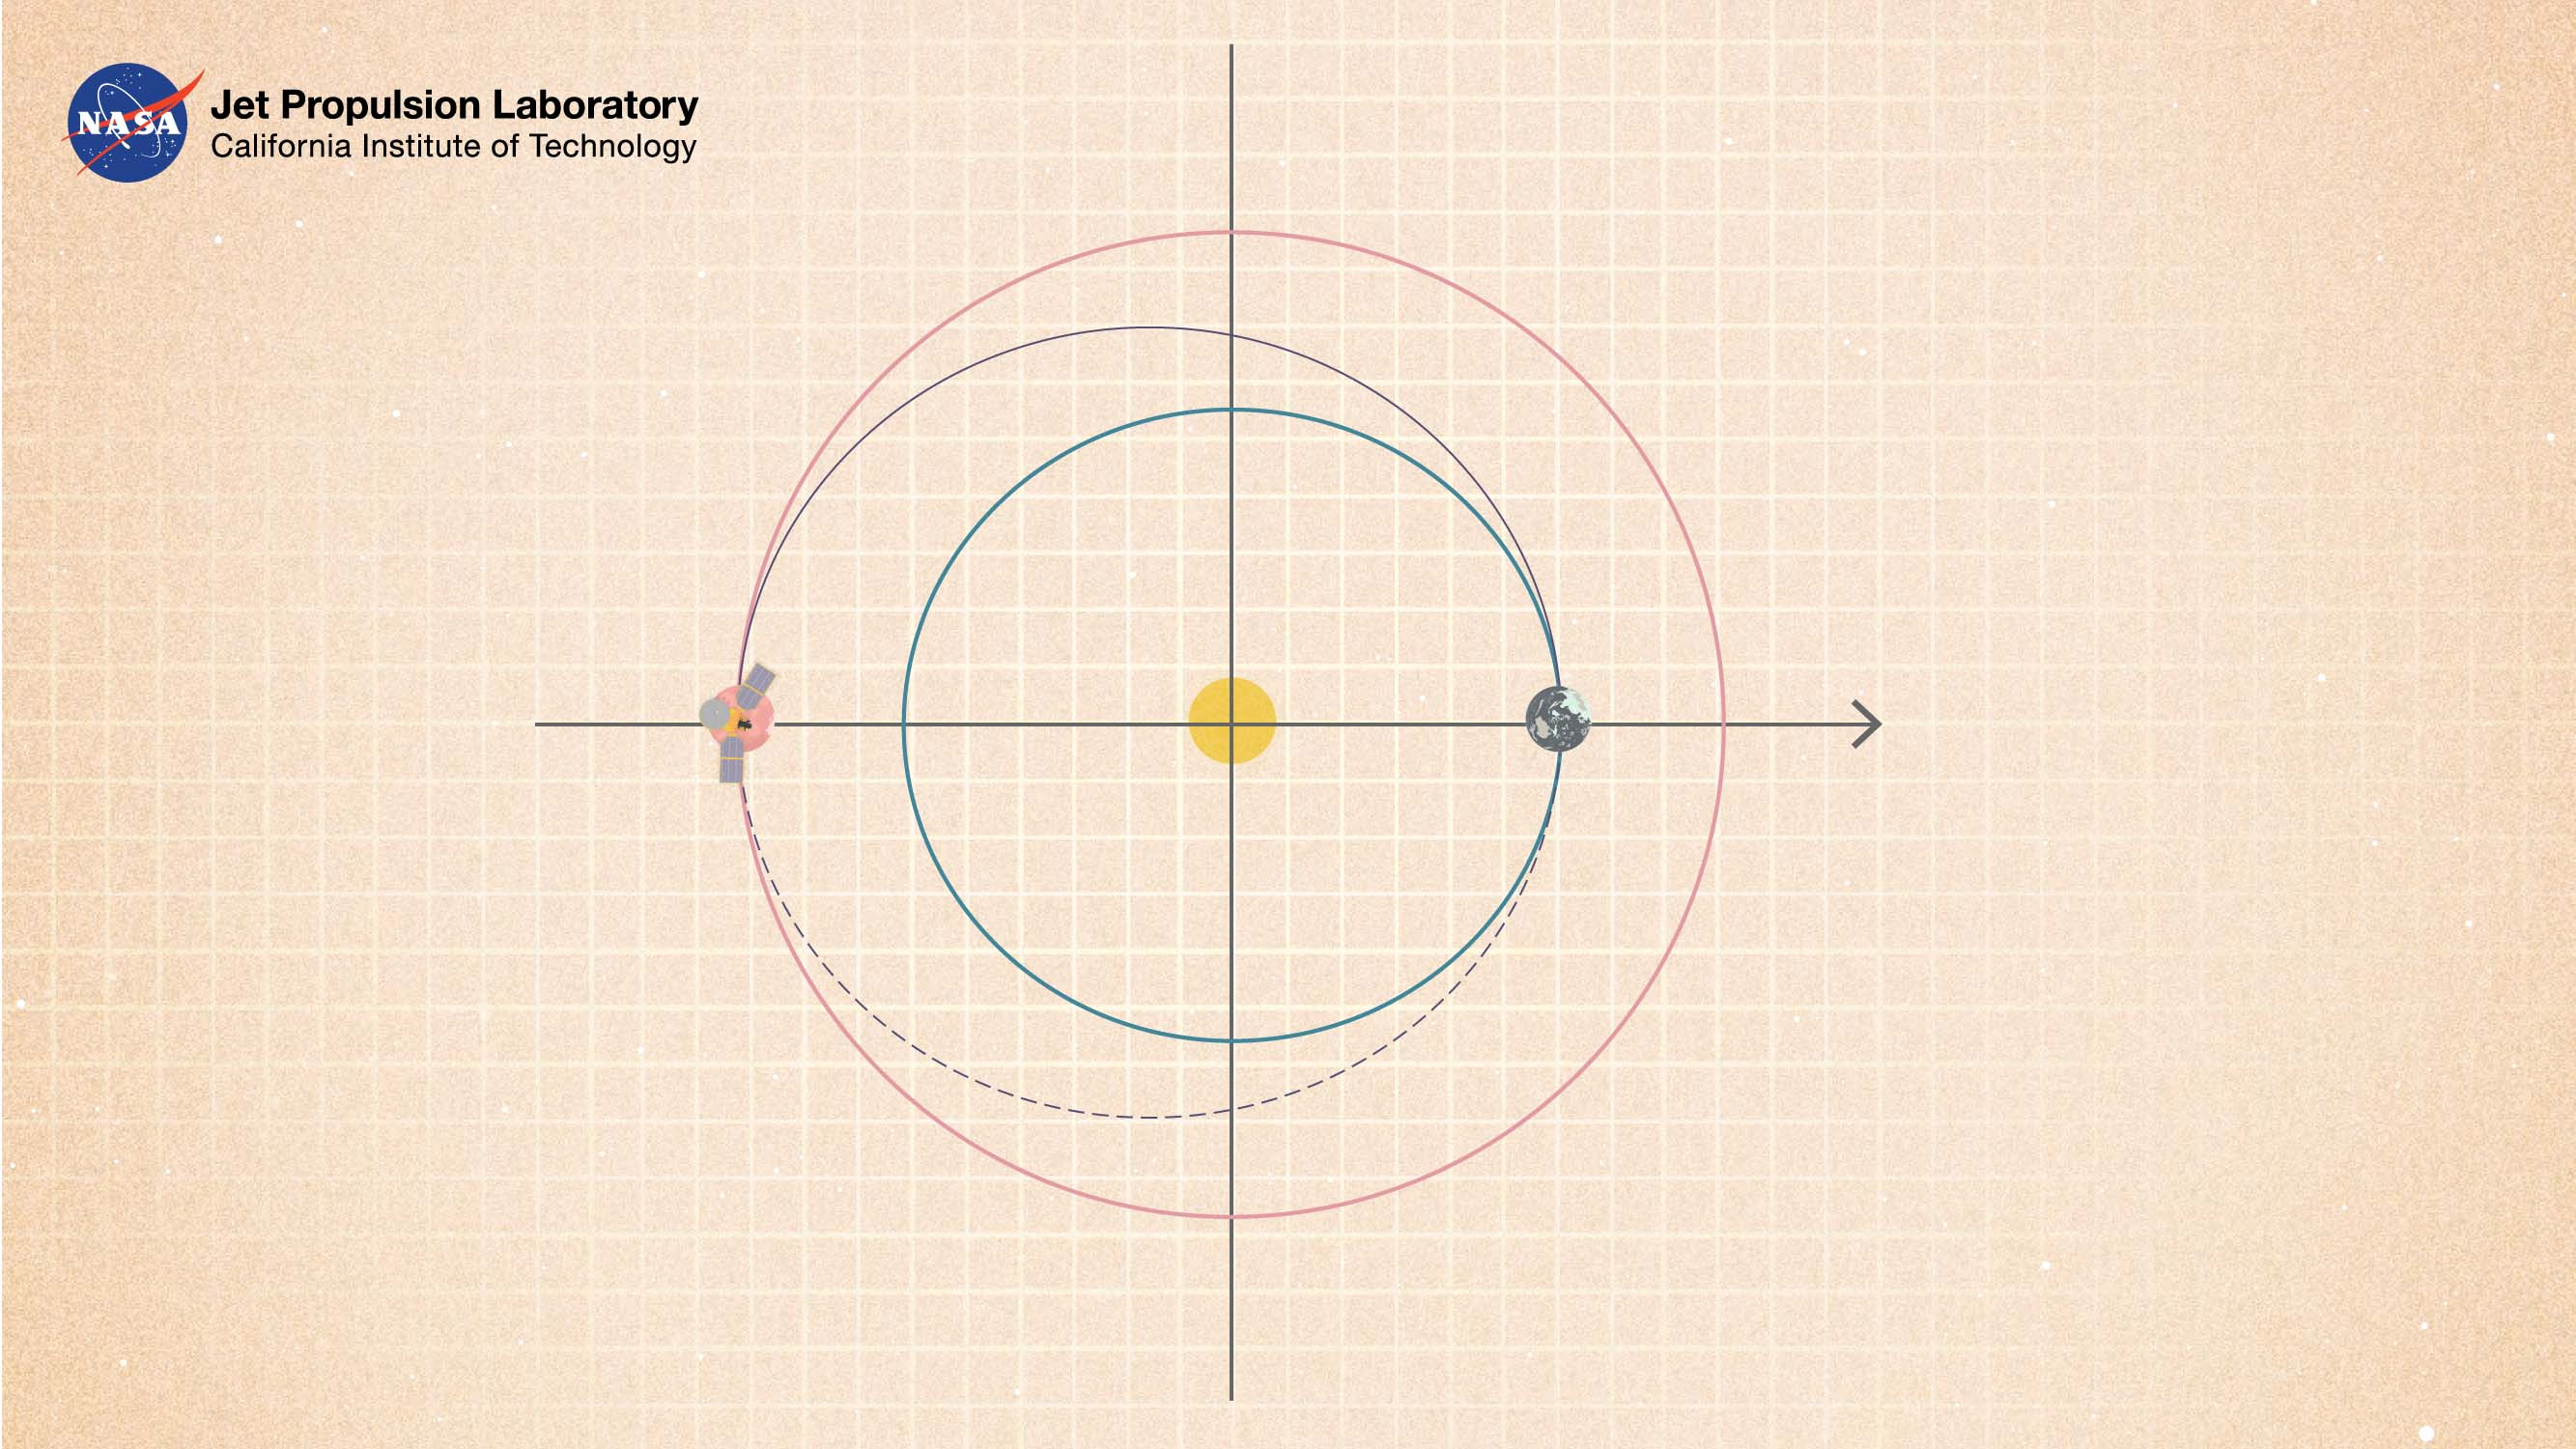


Semi-major Axis (AU):

In [5]:
r_e = 1
r_m = 1.52
a = 0.5*(r_e + r_m)
print(a, "AU")

1.26 AU


Calculating the time to travel to mars using Kepler's third law:
P^2 = ka^3


where k = (P_e^2)/a_e^2

P = sqrt(ka^3)

In [6]:
import numpy as np
from IPython.display import display, Math

k = 1
P = np.sqrt(k*a**3)

display(Math(r'k = {}\ years^2 / a^3'.format(k)))
display(Math(r'P = {}\ years'.format(P)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Convert P to days then half the period P to find the time it takes to get to Mars

In [7]:
P_days = P*365.25
time_m = P_days/2
display(Math(r'Time\ to\ Mars = {:.1f}\ days'.format(time_m)))

<IPython.core.display.Math object>

Calculate by how many degrees Mars moves a day (Mars orbit around sun = 687 days and one orbit is 360 degrees)

In [8]:
degrees_moved = 360/687
print(degrees_moved, "degrees/day")

0.5240174672489083 degrees/day


In [9]:
mars_moved = degrees_moved * time_m
print(mars_moved, "degrees moved since launch")

135.35110644792599 degrees moved since launch


In [12]:
launch_long = 180 - mars_moved
print("Mars must be", launch_long, "degrees ahead of Earth at launch for a successful Hohmann transfer")

Mars must be 44.648893552074014 degrees ahead of Earth at launch for a successful Hohmann transfer


# Now, we need to figure out WHEN will Mars be 44.6 degrees ahead of Earth

The **earth_mars_long.csv** contains the heliocentric longitudes for Earth and Mars from 2010 up to 2030.

In [4]:
import pandas as pd

url = 'https://raw.githubusercontent.com/nancymeena/Astro_Personal_Projects/refs/heads/main/earth_mars_longs.csv'
df = pd.read_csv(url)
df.head()

,YEAR,DAY,EARTH_RAD_AU,EARTH_SE_LAT,EARTH_SE_LON,MARS_RAD_AU,MARS_SE_LAT,MARS_SE_LON
0,2010,1,0.98,0,100.5,1.63,1.7,116.8
1,2010,2,0.98,0,101.5,1.63,1.7,117.2
2,2010,3,0.98,0,102.5,1.63,1.7,117.7
3,2010,4,0.98,0,103.5,1.63,1.7,118.2
4,2010,5,0.98,0,104.5,1.63,1.7,118.6


In [10]:
df['LON_DIFF'] = df['MARS_SE_LON'] - df['EARTH_SE_LON']
df.head()

,YEAR,DAY,EARTH_RAD_AU,EARTH_SE_LAT,EARTH_SE_LON,MARS_RAD_AU,MARS_SE_LAT,MARS_SE_LON,LON_DIFF,LONG_DIFF
0,2010,1,0.98,0,100.5,1.63,1.7,116.8,16.3,16.3
1,2010,2,0.98,0,101.5,1.63,1.7,117.2,15.7,15.7
2,2010,3,0.98,0,102.5,1.63,1.7,117.7,15.2,15.2
3,2010,4,0.98,0,103.5,1.63,1.7,118.2,14.7,14.7
4,2010,5,0.98,0,104.5,1.63,1.7,118.6,14.1,14.1


We need to find the dates where the LON_DIFF is 44.6 degrees


In [9]:
df_launch = df.loc[(df['LON_DIFF'] >= 44.0) & (df['LON_DIFF'] <= 45.0)]
df_launch

,YEAR,DAY,EARTH_RAD_AU,EARTH_SE_LAT,EARTH_SE_LON,MARS_RAD_AU,MARS_SE_LAT,MARS_SE_LON,LON_DIFF,LONG_DIFF
715,2011,351,0.98,0,84.7,1.65,1.8,129.5,44.8,44.8
716,2011,352,0.98,0,85.7,1.65,1.8,129.9,44.2,44.2
1479,2014,19,0.98,0,118.8,1.66,1.7,163.3,44.5,44.5
1480,2014,20,0.98,0,119.8,1.66,1.7,163.8,44.0,44.0
2243,2016,53,0.99,0,152.8,1.62,1.0,197.7,44.9,44.9
2244,2016,54,0.99,0,153.8,1.62,1.0,198.1,44.3,44.3
3015,2018,94,1.00,0,194.2,1.53,-0.3,239.0,44.8,44.8
3016,2018,95,1.00,0,195.2,1.53,-0.3,239.5,44.3,44.3
3806,2020,155,1.01,0,252.9,1.41,-1.7,297.9,45.0,45.0
3807,2020,156,1.01,0,253.8,1.41,-1.7,298.5,44.7,44.7


It seems that the next launch window will occur in 2026